In [1]:
import os
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import image reader to digitize image
from skimage.io import imread, imshow

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [2]:
# create dictionary
dataDict = {'target_names': [], 'target': [], 'images': []}

In [3]:
# loop through directory of images with good plots
for subdir, dirs, files in os.walk('C:/Users/user/Documents/ml_classifications/goodplots'):
    for file in files:
        if file.endswith(".png"):
            filepath = subdir + os.sep + file
            # create grey scale and digitize image into matrices
            image = imread(filepath, as_gray=True)
            # add to dictionary
            dataDict['target_names'].append(file)
            dataDict['target'].append(1)
            dataDict['images'].append(image)

In [4]:
# loop through directory of images with bad plots
for subdir, dirs, files in os.walk('C:/Users/user/Documents/ml_classifications/badplots'):
    for file in files:
        if file.endswith(".png"):
            filepath = subdir + os.sep + file
            # create grey scale and digitize image into matrices
            image = imread(filepath, as_gray=True)
            # add to dictionary
            dataDict['target_names'].append(file)
            dataDict['target'].append(0)
            dataDict['images'].append(image)

In [5]:
# Convert to numpy array
imagesArry = np.asarray(dataDict['images'])

In [17]:
np.unique(imagesArry[0])

array([0.41058078, 1.        ])

In [6]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(imagesArry)
data = imagesArry.reshape((n_samples, -1))

In [7]:
data.shape, n_samples, imagesArry.shape

((5551, 40000), 5551, (5551, 200, 200))

In [8]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

In [9]:
# Split data into train and test subsets
# test_size is percentage of data used to test
# random_state is the number you want to use for the random algorithm
X_train, X_test, y_train, y_test = train_test_split(
    data, dataDict['target'], test_size=0.2, shuffle=True, random_state=4)

In [10]:
X_train.shape, len(y_train)

((4440, 40000), 4440)

In [11]:
# We learn from the train data
classifier.fit(X_train, np.asarray(y_train))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.93      0.68      0.78       298
           1       0.89      0.98      0.93       813

    accuracy                           0.90      1111
   macro avg       0.91      0.83      0.86      1111
weighted avg       0.90      0.90      0.89      1111


Confusion matrix:
[[202  96]
 [ 16 797]]


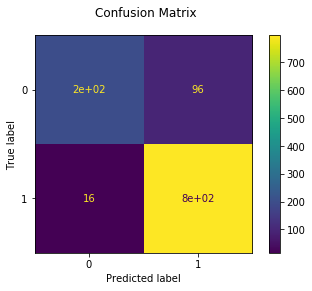

In [13]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [14]:
# Print out which indices were predicted wrong
for indx, val in enumerate(y_test):
    # Get false negatives
    if (val != predicted[indx]) and (predicted[indx] == 0):
        print(indx)

45
245
284
406
452
514
725
754
772
813
831
920
924
941
987
1041


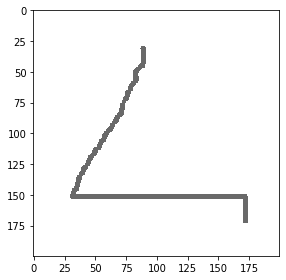

In [20]:
imshow(X_test[813].reshape(200,200))

In [ ]:
for indx, val in enumerate(y_test):
    # Get false negatives
    if (val != predicted[indx]) and (predicted[indx] == 0):
        print(indx)